### GHG Data Prep  
Justin Parsons  
MSDS 696 - Spring 2025  

This notebook performs a few functions in order to prepare data for the neural network training notebook, also contained in this repository. EDA-related cells were left in, but may be omitted.

In [ ]:
#import necessary libraries
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

The next three cells involve importing data from my Google Drive account. These will need to be modified for your environment specifics.

In [ ]:

#mount google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path to personal drive's top level GHG directory
path = '/content/drive/MyDrive/GHG/MSDS696/MSDS696_GHG/'

In [ ]:
df = pd.read_csv(path+'Data/GHG_Post_Outlier.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44079 entries, 0 to 44078
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   account_name                44079 non-null  object 
 1   account_id                  44079 non-null  int64  
 2   Year                        44079 non-null  int64  
 3   incorporated_country        44079 non-null  object 
 4   Primary activity            44079 non-null  object 
 5   Primary sector              44079 non-null  object 
 6   Market_Cap_USD              37591 non-null  float64
 7   Third_party_verification    44055 non-null  object 
 8   Revenue_USD                 37799 non-null  float64
 9   ebitda_USD                  37799 non-null  float64
 10  grossProfit_USD             37799 non-null  float64
 11  netIncome_USD               37799 non-null  float64
 12  cashAndCashEquivalents_USD  37799 non-null  float64
 13  shortTermInvestments_USD    377

These were added as a sanity check while modeling. While they are hard to compare against other features in a neural network, other algorithms are much more transparent when comparing features.

In [ ]:
#adding random normal and uniform features
df['random_normal'] = np.random.normal(loc=0, scale=1, size=len(df))
df['random_uniform'] = np.random.uniform(low=0, high=1, size=len(df))


In [ ]:
#NaN and zeros for each feature
for column in df.columns:
  print(f"Feature: {column}")
  print(f"Number of NaN values: {df[column].isnull().sum()}")
  print(f"Number of zero values: {(df[column] == 0).sum()}")
  print("-" * 20)


Feature: account_name
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: account_id
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: Year
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: incorporated_country
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: Primary activity
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: Primary sector
Number of NaN values: 0
Number of zero values: 0
--------------------
Feature: Market_Cap_USD
Number of NaN values: 6488
Number of zero values: 0
--------------------
Feature: Third_party_verification
Number of NaN values: 24
Number of zero values: 0
--------------------
Feature: Revenue_USD
Number of NaN values: 6280
Number of zero values: 0
--------------------
Feature: ebitda_USD
Number of NaN values: 6280
Number of zero values: 0
--------------------
Feature: grossProfit_USD
Number of NaN values: 6280
Num

Drop NaN and 0s as the data exists currently.

In [ ]:
df.dropna(inplace=True)

for col in df.columns:
    df = df[df[col] != 0]


In [ ]:
#number of samples per year.
print(df.groupby('Year')['Year'].count())

Year
2018    4113
2019    4457
2020    4703
2021    4937
2022    5394
2023    4774
Name: Year, dtype: int64


In [ ]:
df.describe()

,account_id,Year,Market_Cap_USD,Revenue_USD,ebitda_USD,grossProfit_USD,netIncome_USD,cashAndCashEquivalents_USD,shortTermInvestments_USD,longTermInvestments_USD,...,totalLiabilities_USD,totalInvestments_USD,totalDebt_USD,totalEquity_USD,Scope_3_emissions_amount,country_ghg_avg,country_population_avg,country_gdp_avg,random_normal,random_uniform
count,28378.000000,28378.000000,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,...,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,2.837800e+04,28378.000000,2.837800e+04,2.837800e+04,28378.000000,28378.000000
mean,15956.704525,2020.611882,4.874797e+10,1.695184e+10,3.459872e+09,8.046440e+09,1.735156e+09,6.293506e+09,4.875216e+09,1.411272e+10,...,5.346847e+10,1.742614e+10,1.229985e+10,1.234594e+10,8.301563e+05,1992.734421,1.816380e+08,7.212537e+12,-0.005097,0.501243
std,13232.784212,1.676557,2.614430e+11,2.880420e+10,8.215505e+09,1.621768e+10,5.505391e+09,3.242409e+10,3.422315e+10,7.044945e+10,...,2.146083e+11,8.468694e+10,3.685622e+10,2.486243e+10,3.494939e+06,2757.280060,2.742743e+08,8.276089e+12,0.999735,0.288616
min,64.000000,2018.000000,2.449135e+06,-1.711368e+10,-9.289400e+10,-2.699258e+10,-1.680588e+10,-5.646928e+07,-1.414534e+12,-1.626800e+10,...,5.672568e+07,-4.319000e+09,2.560000e+04,-9.446000e+09,2.000000e-03,9.384733,6.486508e+05,8.159748e+10,-5.382391,0.000036
25%,7156.000000,2019.000000,2.945895e+09,3.346790e+09,4.322713e+08,9.492000e+08,1.272768e+08,4.169792e+08,3.240000e+06,1.027481e+08,...,2.681517e+09,1.504448e+08,9.381600e+08,1.963003e+09,3.141100e+03,428.766726,6.114104e+07,1.851825e+12,-0.679762,0.251547
50%,13604.000000,2021.000000,7.981380e+09,8.265240e+09,1.159949e+09,2.466179e+09,4.572480e+08,1.066563e+09,5.950800e+07,5.443220e+08,...,7.478554e+09,6.724160e+08,3.168883e+09,4.767580e+09,2.300000e+04,1173.044363,1.258077e+08,4.772504e+12,-0.003893,0.501388
75%,19877.000000,2022.000000,2.566979e+10,1.864605e+10,3.088000e+09,7.077710e+09,1.377165e+09,2.758120e+09,5.340000e+08,2.136766e+09,...,2.261691e+10,2.313190e+09,9.039628e+09,1.175856e+10,1.918072e+05,1173.044363,1.258077e+08,4.772504e+12,0.674406,0.752589
max,74137.000000,2023.000000,6.283032e+12,3.943280e+11,1.305410e+11,1.740620e+11,9.980300e+10,7.408340e+11,4.505814e+11,1.229707e+12,...,3.547515e+12,1.528885e+12,7.756765e+11,3.278780e+11,5.199799e+07,13105.528962,1.410932e+09,2.383859e+13,3.809949,0.999904


Drop accountID and account_id. They are not a meaningful feature for training.

In [ ]:
df.drop(['account_id', 'account_name'], axis=1, inplace=True, errors='ignore')

In [ ]:
df['Scope_3_emissions_type'].unique()

array(['Purchased goods and services',
       'Fuel-and-energy-related activities (not included in Scope 1 or 2)',
       'Waste generated in operations', 'Business travel',
       'Upstream transportation and distribution', 'Employee commuting',
       'Downstream transportation and distribution', 'Capital goods',
       'Processing of sold products', 'Use of sold products',
       'End of life treatment of sold products', 'Investments',
       'Upstream leased assets', 'Other (upstream)', 'Other (downstream)',
       'Downstream leased assets', 'Franchises'], dtype=object)

In [ ]:
#truncating one label to save space
df['Scope_3_emissions_type'] = df['Scope_3_emissions_type'].replace(
    'Fuel-and-energy-related activities (not included in Scope 1 or 2)',
    'Fuel-and-energy-related activities'
)

Here each emission type is given it's own dataframe for all data associated with it and saved as a CSV for ingest into the neural network training notebook.

In [ ]:
#output CSV for all data associated with individual Scope_3_emissions_types
path = '/content/drive/MyDrive/GHG/MSDS696/MSDS696_GHG/Data/Scope_3_emissions_type_csvs'

os.makedirs(path, exist_ok=True)  #needed for creation of dir if it does/does not exist

#iterate through unique Scope_3_emission_type values
for emission_type in df['Scope_3_emissions_type'].unique():
    #filter the DataFrame for the current emission type
    df_emission_type = df[df['Scope_3_emissions_type'] == emission_type]

    #create a CSV file for the current emission type
    csv_filename = f'{path}/{emission_type}.csv'
    df_emission_type.to_csv(csv_filename, index=False)

print("CSV files for each Scope_3_emissions_type created successfully.")


CSV files for each Scope_3_emissions_type created successfully.


Here we verify that there is a "minimum" amount of samples for each emissionst type for training.

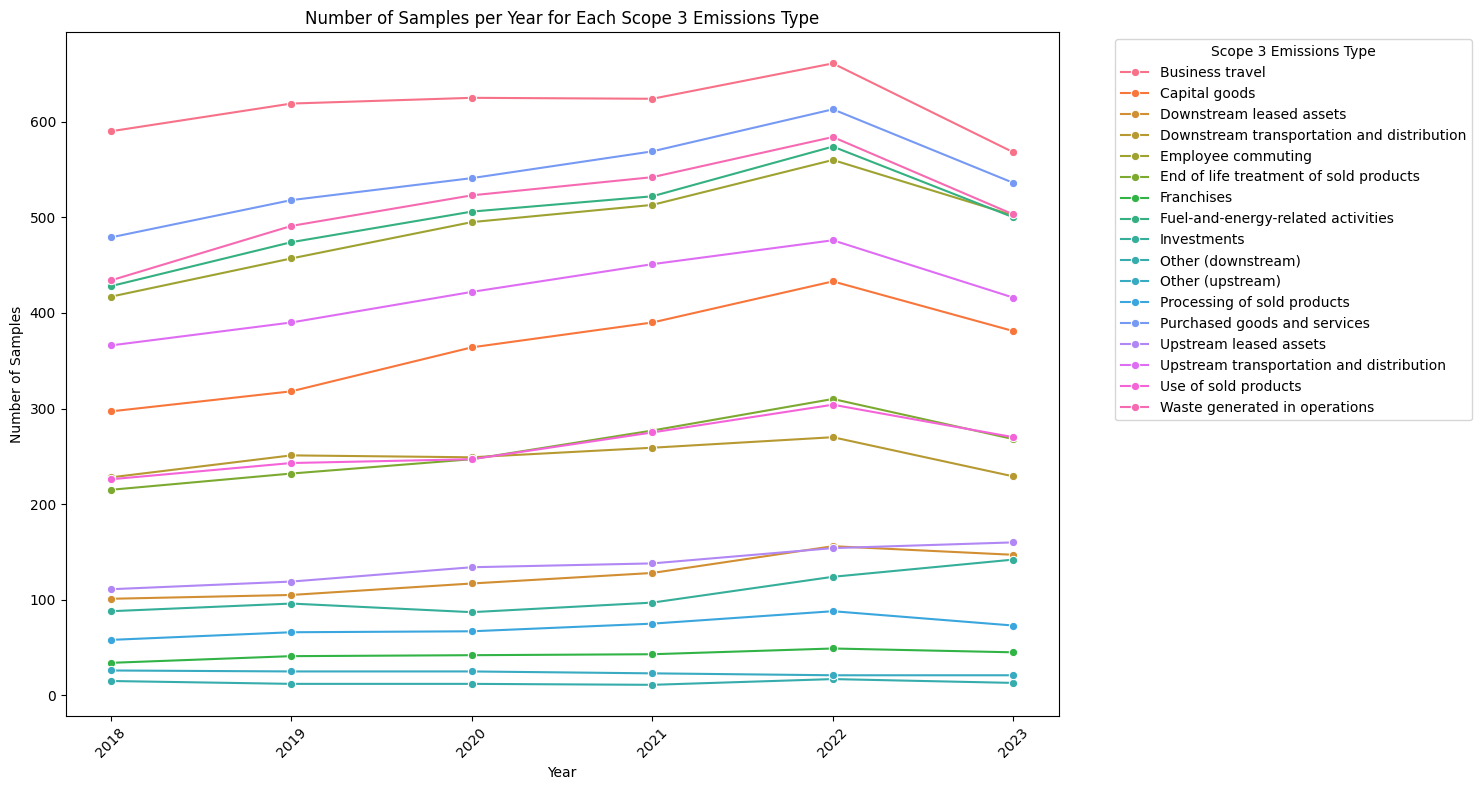

In [ ]:
# prompt: display plots of how many samples per year for each Scope 3 emissions type

# Group the data by year and Scope 3 emissions type and count the number of samples
samples_per_year = df.groupby(['Year', 'Scope_3_emissions_type'])['Year'].count().reset_index(name='Count')

# Create the plots
plt.figure(figsize=(15, 8))
sns.lineplot(x='Year', y='Count', hue='Scope_3_emissions_type', data=samples_per_year, marker='o')
plt.title('Number of Samples per Year for Each Scope 3 Emissions Type')
plt.xlabel('Year')
plt.ylabel('Number of Samples')
plt.xticks(rotation=45)
plt.legend(title='Scope 3 Emissions Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 28378 entries, 5 to 44063
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Year                        28378 non-null  int64  
 1   incorporated_country        28378 non-null  object 
 2   Primary activity            28378 non-null  object 
 3   Primary sector              28378 non-null  object 
 4   Market_Cap_USD              28378 non-null  float64
 5   Third_party_verification    28378 non-null  object 
 6   Revenue_USD                 28378 non-null  float64
 7   ebitda_USD                  28378 non-null  float64
 8   grossProfit_USD             28378 non-null  float64
 9   netIncome_USD               28378 non-null  float64
 10  cashAndCashEquivalents_USD  28378 non-null  float64
 11  shortTermInvestments_USD    28378 non-null  float64
 12  longTermInvestments_USD     28378 non-null  float64
 13  totalAssets_USD             28378 no